
Laporan Klasifikasi:
              precision    recall  f1-score   support

        2015       1.00      1.00      1.00      2833
        2016       1.00      1.00      1.00      2927
        2017       1.00      1.00      1.00      2935
        2018       1.00      1.00      1.00      2907
        2019       1.00      1.00      1.00      2871
        2020       1.00      1.00      1.00      2880
        2021       1.00      1.00      1.00      2882
        2022       1.00      1.00      1.00      2800
        2023       1.00      1.00      1.00       725

    accuracy                           1.00     23760
   macro avg       1.00      1.00      1.00     23760
weighted avg       1.00      1.00      1.00     23760


Akurasi Model: 1.0


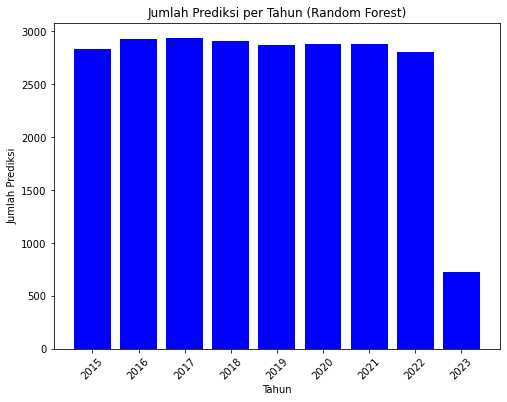

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Anda dapat menyesuaikan n_estimators sesuai kebutuhan

# Latih model dengan data latih
rf_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)

# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Tampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))

# Hitung akurasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAkurasi Model:", accuracy_rf)

# Menambahkan kolom 'Year' ke data uji
X_test['Year'] = data['Year']

# Menginisialisasi daftar untuk menyimpan jumlah prediksi yang benar per tahun
prediksi_per_tahun_rf = []

# Memecah data uji menjadi tahunan dan menghitung jumlah prediksi yang benar per tahun
for tahun in range(2015, 2024):
    data_tahun = X_test[X_test['Year'] == tahun]
    y_pred_tahun = y_pred_rf[X_test['Year'] == tahun]
    prediksi_tahun = (data_tahun['Year'] == y_pred_tahun).sum()  # Ganti 'Year' dengan nama kolom target Anda
    prediksi_per_tahun_rf.append(prediksi_tahun)

# Plot diagram batang jumlah prediksi yang benar per tahun
plt.figure(figsize=(8, 6))
plt.bar(tahun_label, prediksi_per_tahun_rf, color='blue')  # Menggunakan warna biru untuk Random Forest
plt.title('Jumlah Prediksi per Tahun (Random Forest)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Prediksi')
plt.xticks(rotation=45)  # Rotasi label tahun agar lebih mudah dibaca
plt.show()
